![image](https://user-images.githubusercontent.com/57321948/196933065-4b16c235-f3b9-4391-9cfe-4affcec87c35.png)

# **Class - 69 `Deep Learning`**
## **19 February 2023**
In this class **Paul Sir** taught **LeNet- 5**

### **Agenda of Today Class**
1. **Receptive Fields**

i. **Local Receptive Fields**

ii. **Global Receptive Fields**

2. **Paramerer Calculation**

i. **Kernels**

ii. **Padding**

iii. **Stride**

iv. **Bias**

3. **LeNet - 5**
4. **Alexnet**

## $$Formula= \bf{\Big((m \times n \times d)+ 1 \Big)+ k}$$
where, $\bf{m}$ is the **width**, $\bf{n}$ is the **height**, $\bf{d}$ is the **channels from previous layers** and $\bf{k}$ is the **current number of filters using**

## $\bf{\underline{\text{Uses}}}$
1. **Image Classification**
2. **Object Detection**
3. **Segmentation**
4. **Tracking**

### Receptive Field
Receptive Field (RF) is atleast close to the input image resolution.

| **Image Size** | **RF**      | **RF**         |
|----------------|-------------|----------------|
| $300 \times 30$| 290/280/270 | 400, 3600, 800 |


In [1]:
from tensorflow.keras.datasets import mnist
import os
import pandas as pd
import numpy as np


In [2]:
# Use keras to import pre-shuffled dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f"Training size: {X_train.shape}")
print(f"Test size: {X_test.shape}")

11490434/11490434 [==============================] - 2s 0us/step
Training size: (60000, 28, 28)
Test size: (10000, 28, 28)


## Visualizing first six images

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

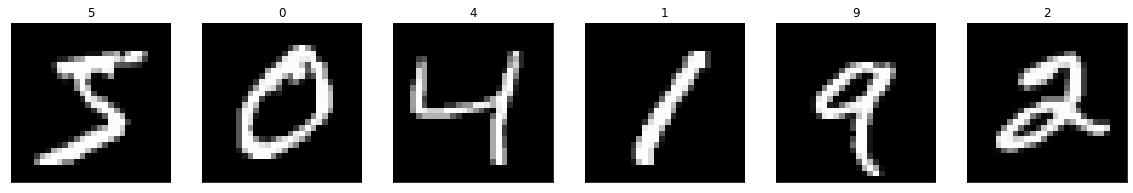

In [4]:
fig = plt.figure(figsize=(20,20))
for i in range(0,6):
  ax = fig.add_subplot(1,6, i+1, xticks=[], yticks=[])
  ax.imshow(X_train[i], cmap='gray')
  ax.set_title(str(y_train[i]))


## View an image in more details

Thresh  102.0


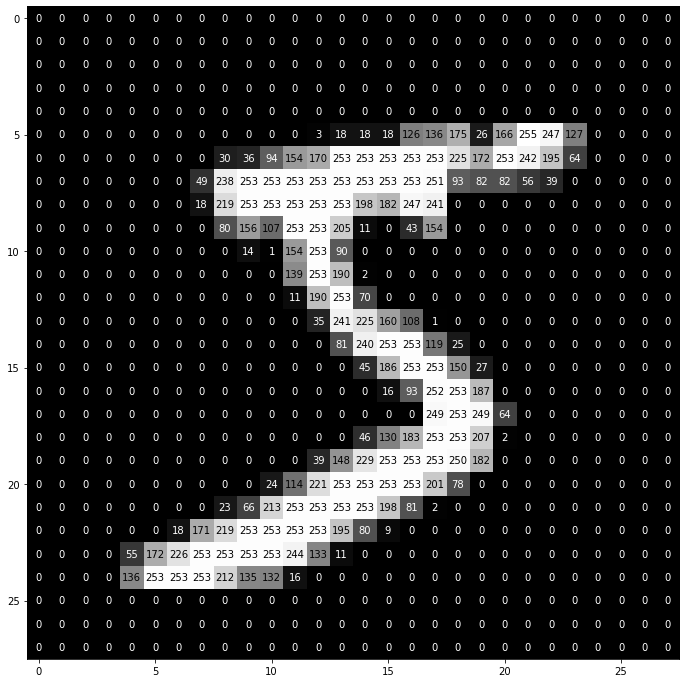

In [5]:
def visualize_image(img, ax):
  ax.imshow(img, cmap='gray')
  width, height = img.shape
  thresh = img.max() / 2.5

  for i in range(width):
    for j in range(height):
      ax.annotate(str(round(img[i][j],2)),xy= (j,i),horizontalalignment='center',
                  verticalalignment= 'center', color = 'white' if img[i][j]<thresh else 'black')
  print("Thresh ", thresh)



fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
visualize_image(X_train[0], ax)

## Preprocess input images: Rescale the Images by Dividing Every Pixel in Every Image by 255

In [6]:
# rescale to have values within 0 - 1 range [0,255] --> [0,1]

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

## Preprocess the labels: Encode Categorical Integer Labels Using a One-Hot Scheme

In [7]:
from keras.utils import np_utils

num_classes = 10
# print first ten (integer-valued) training labels
print('Interger value of labels:', y_train[:10], sep='\n')

# one-hot encode the labels
# convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

# print first ten (one-hot) training labels
print("One-hot label:", y_train[:10], sep='\n')




Interger value of labels:
[5 0 4 1 9 2 1 3 1 4]
One-hot label:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [8]:
y_train.shape

(60000, 10)

In [9]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

## Reshape data to fit our CNN (and input_shape)

In [10]:
# input image dimensions 28x28 pixel images. 
img_rows, img_cols = 28, 28

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

print('input_shape: ', input_shape)
print('x_train shape:', X_train.shape)

input_shape:  (28, 28, 1)
x_train shape: (60000, 28, 28, 1)


In [11]:
X_train.shape

(60000, 28, 28, 1)

In [12]:
X_train[0][0][0]

array([0.], dtype=float32)

#Architecture 

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [14]:
# build the model object
model = Sequential()

# CONV_1: add CONV layer with RELU activation and depth = 32 kernels
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu',input_shape=(28,28,1))) #28,28,32
# POOL_1: downsample the image to choose the best features 
model.add(MaxPooling2D(pool_size=(2,2)))  # 14, 14, 32

# CONV_2: here we increase the depth to 64
model.add(Conv2D(64, kernel_size=(3,3), padding='same',activation='relu')) # 14, 14, 64
# POOL_2: more downsampling
model.add(MaxPooling2D(pool_size=(2,2))) #7,7,64

# flatten since too many dimensions, we only want a classification output
model.add(Flatten())

# FC_1: fully connected to get all relevant data
model.add(Dense(64, activation='relu'))
# FC_2: output a softmax to squash the matrix into output probabilities for the 10 classes
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 64)                2

## Compile the Model

In [15]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

## Train the Model

In [16]:
from tensorflow.keras.callbacks import ModelCheckpoint   

# train the model

hist = model.fit(X_train, y_train, batch_size=64, epochs=10,
          validation_data=(X_test, y_test),
          verbose=2, shuffle=True)

Epoch 1/10
938/938 - 14s - loss: 0.1571 - accuracy: 0.9512 - val_loss: 0.0449 - val_accuracy: 0.9852 - 14s/epoch - 15ms/step
Epoch 2/10
938/938 - 4s - loss: 0.0444 - accuracy: 0.9863 - val_loss: 0.0325 - val_accuracy: 0.9890 - 4s/epoch - 4ms/step
Epoch 3/10
938/938 - 4s - loss: 0.0301 - accuracy: 0.9905 - val_loss: 0.0313 - val_accuracy: 0.9887 - 4s/epoch - 4ms/step
Epoch 4/10
938/938 - 4s - loss: 0.0223 - accuracy: 0.9929 - val_loss: 0.0265 - val_accuracy: 0.9918 - 4s/epoch - 4ms/step
Epoch 5/10
938/938 - 4s - loss: 0.0174 - accuracy: 0.9946 - val_loss: 0.0247 - val_accuracy: 0.9921 - 4s/epoch - 4ms/step
Epoch 6/10
938/938 - 4s - loss: 0.0134 - accuracy: 0.9961 - val_loss: 0.0261 - val_accuracy: 0.9915 - 4s/epoch - 4ms/step
Epoch 7/10
938/938 - 4s - loss: 0.0104 - accuracy: 0.9965 - val_loss: 0.0268 - val_accuracy: 0.9915 - 4s/epoch - 5ms/step
Epoch 8/10
938/938 - 4s - loss: 0.0090 - accuracy: 0.9972 - val_loss: 0.0265 - val_accuracy: 0.9924 - 4s/epoch - 4ms/step
Epoch 9/10
938/938 - 

In [17]:
import pandas as pd
df1 = pd.DataFrame(hist.history)

In [18]:
df1

,loss,accuracy,val_loss,val_accuracy
0,0.157102,0.951200,0.044940,0.9852
1,0.044444,0.986267,0.032507,0.9890
2,0.030097,0.990533,0.031280,0.9887
3,0.022320,0.992917,0.026487,0.9918
4,0.017381,0.994567,0.024675,0.9921
5,0.013360,0.996083,0.026142,0.9915
6,0.010432,0.996533,0.026770,0.9915
7,0.009012,0.997233,0.026510,0.9924
8,0.007131,0.997850,0.027747,0.9920
9,0.005216,0.998483,0.030383,0.9924


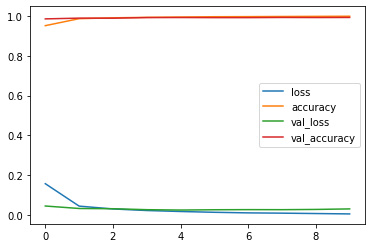

In [19]:
pd.DataFrame(hist.history).plot()

##  Calculate the Classification Accuracy on the Test Set


In [20]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 99.2400%
